<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Whitacre_College_of_Engineering_logo.svg/2560px-Whitacre_College_of_Engineering_logo.svg.png" alt="Your Image" width="200" height="150">


# Red Wine Quality Project - ENGR 1330 🍷
<img src="https://www.theriedelshop.co.uk/cdn/shop/articles/red-wine.jpg?v=1691152056" alt="Your Image" width="200" height="150">


**Authors:** Sai Darsh Kandukuri and David Ekekezie

**Last update:** 2023-12-9

How to video is at the end of this file

**Description:** The "Red Wine Quality Project - ENGR 1330" by Sai Darsh Kandukuri and David Ekekezie, is a project utilizing Python libraries to analyze and predict red wine quality, integrating data analysis with a user-friendly interface for practical application in the wine industry.

## Literature Review 🍷

In the paper called "Modeling wine preferences by data mining from physicochemical properties," the authors look into how to use data mining methods on the physicochemical properties of wines to guess what people will like in a wine. The study is mostly about a big set of samples of Portuguese white and red Vinho Verde wine. The writers used three different regression methods. The support vector machine performed better than both multiple regression and neural network methods. This model helps oenologists judge wine tastings, and it could also help with marketing by letting yourself model the tastes of people in niche markets.

## Works Cited🍷

https://docs.google.com/document/d/1xJyhJ_fpyRZwnWEFHymN5yOGbu4SjaezXWBh9qIp__s/edit?usp=sharing

## Data Loading🍷

### Import libraries📈

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

**Imported Tools:**
- Pandas: Essential for data manipulation 
- NumPy:  Essential for data manipulation 
- Scikit-learn: Essential for the model that I will build

### Loading the Dataset📈

In [33]:
file_path = 'redwinequality(1).csv'
data = pd.read_csv(file_path)
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## Exploratory Data Analysis🍷

### Graph Color📈

In [34]:
ttu_red = '#CC0000'

### Basic Information📈

In [35]:
print("Dataset Shape:", data.shape)
print("\nFirst 5 Rows of Dataset:\n", data.head())
print("\nDataset Info:")
data.info()
print("\nDescriptive Statistics:\n", data.describe())

Dataset Shape: (1599, 12)

First 5 Rows of Dataset:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4 

### Histograms📈

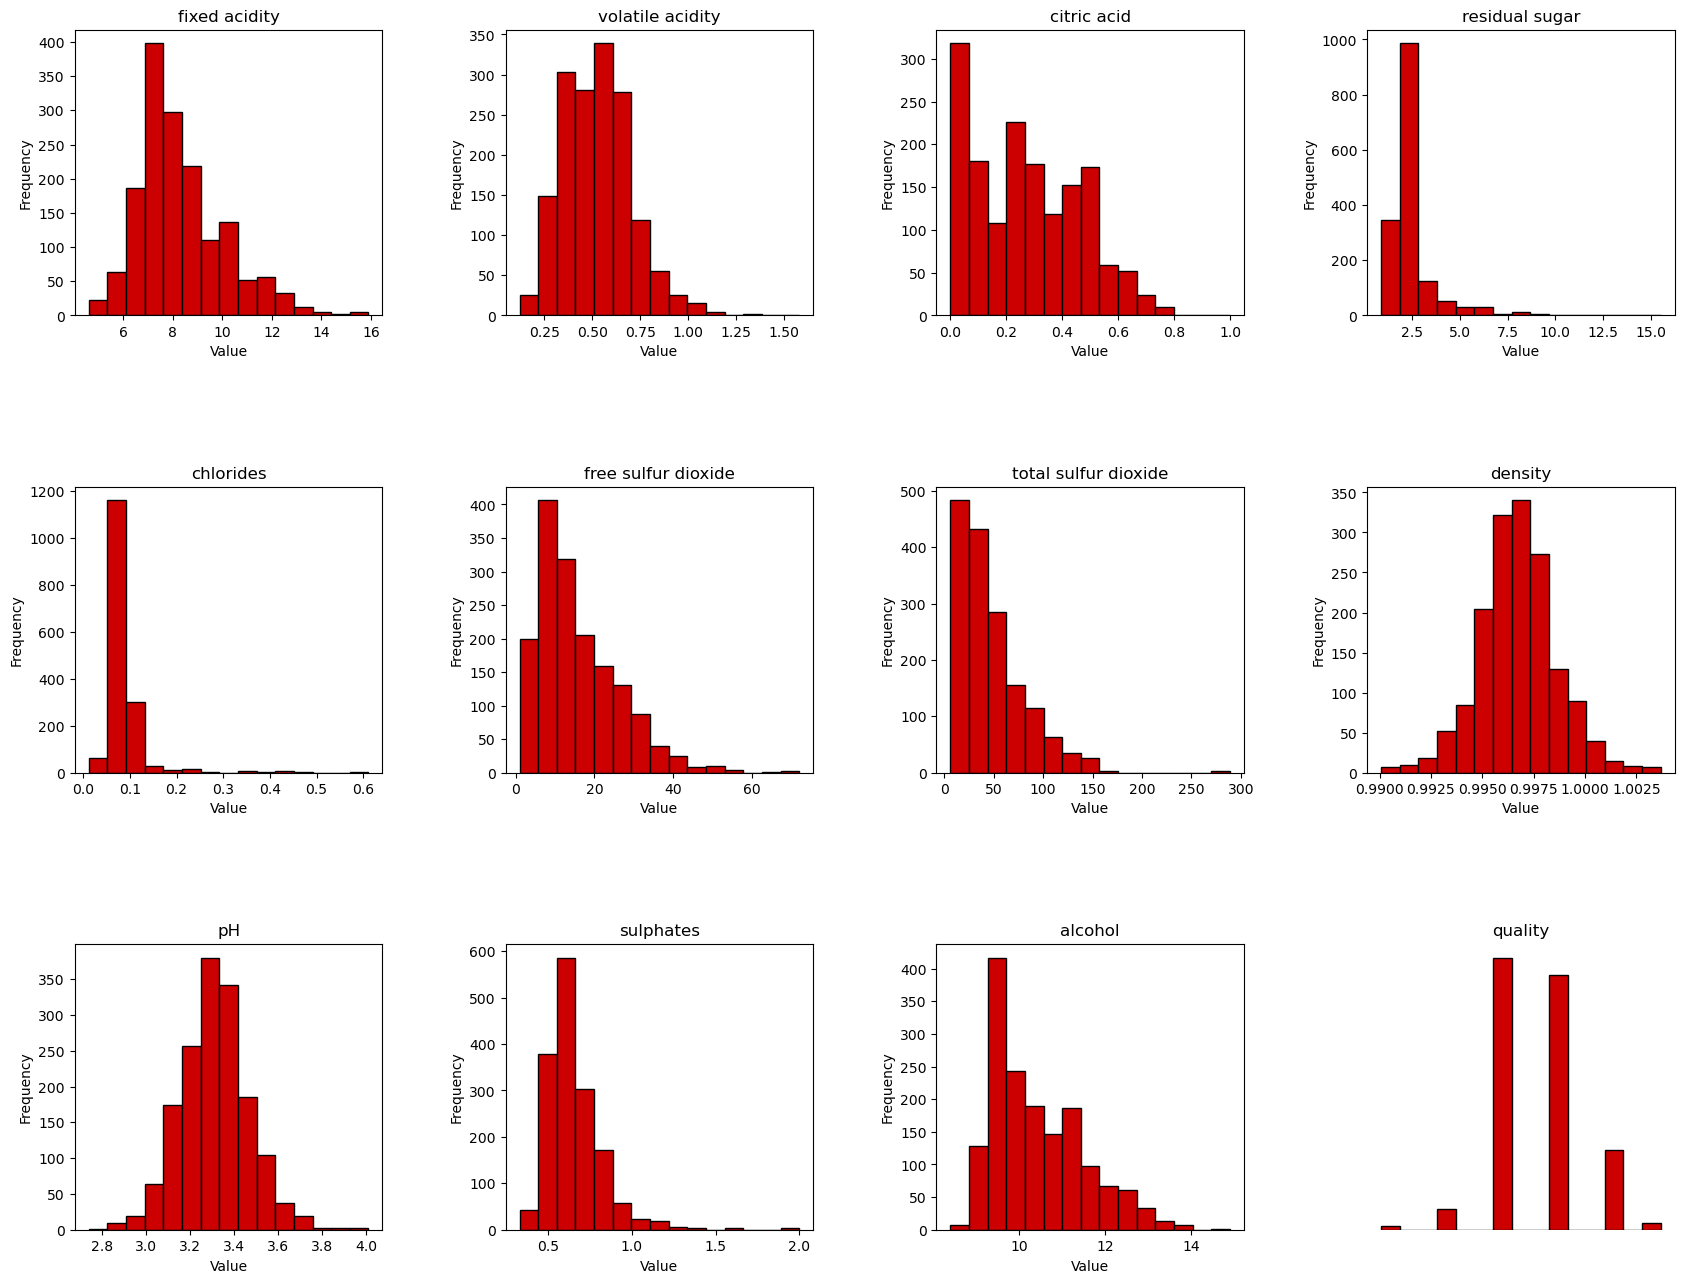

In [36]:
import pandas as pd

wine_data = pd.read_csv(file_path)
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 15)) 
axs = axs.flatten()  

for i, ax in enumerate(axs):
    if i < len(wine_data.columns):
        ax.hist(wine_data.iloc[:, i], bins=15, color=ttu_red, edgecolor='black')
        ax.set_title(wine_data.columns[i], fontsize=12)
        ax.set_xlabel('Value', fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
    else:z
ax.axis('off')  

plt.tight_layout()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

plt.show()

### Box Plots📈

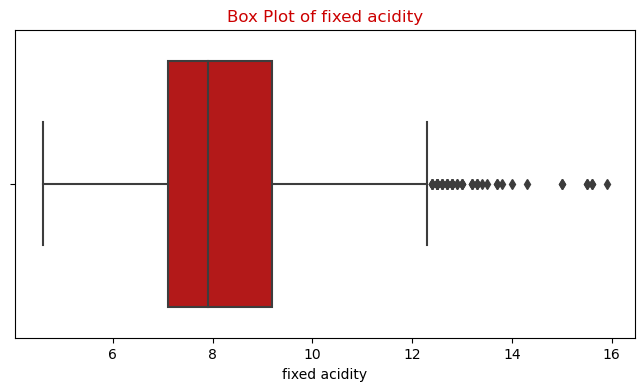

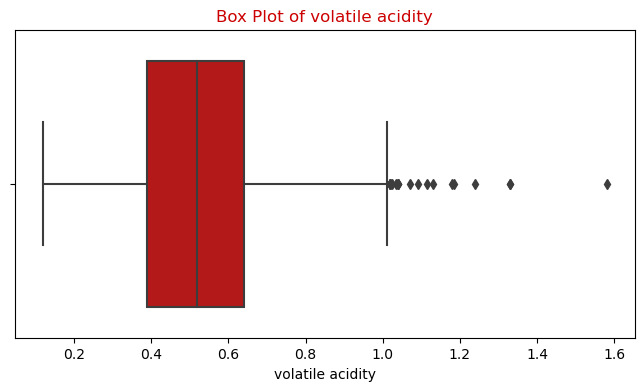

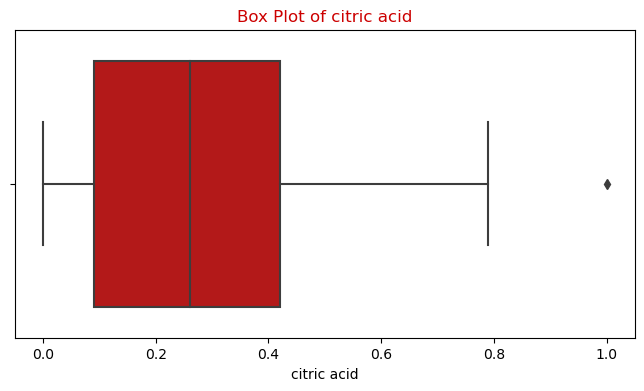

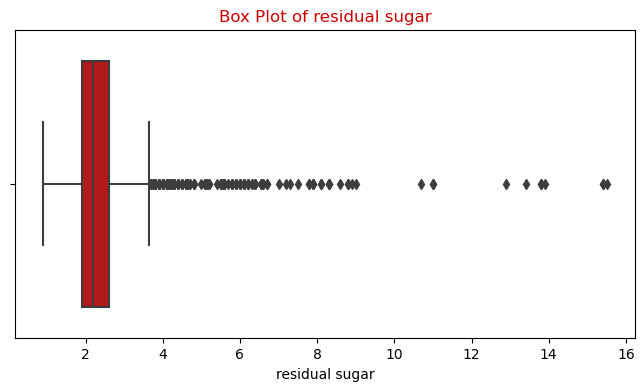

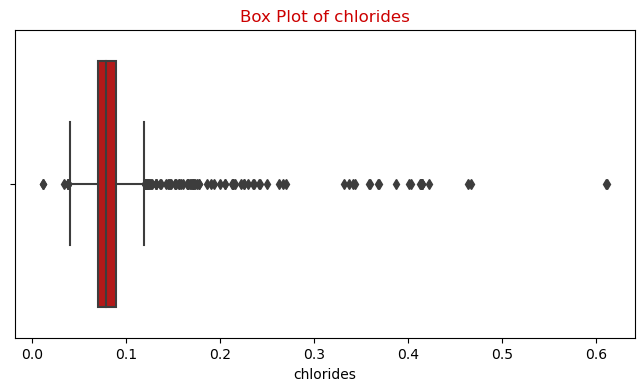

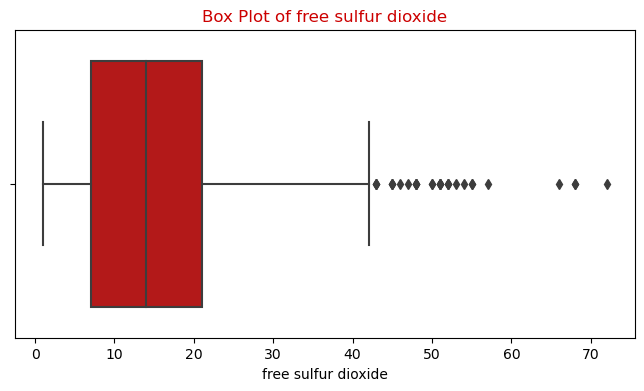

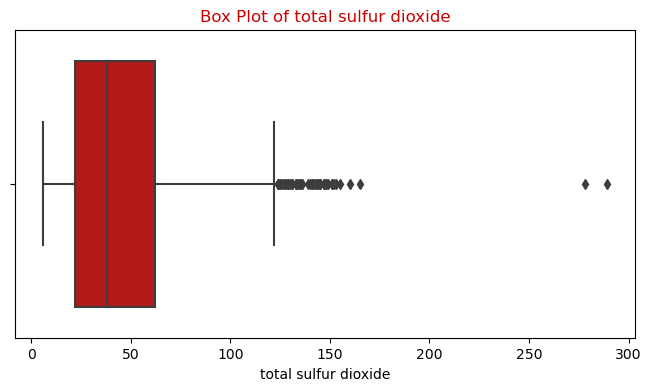

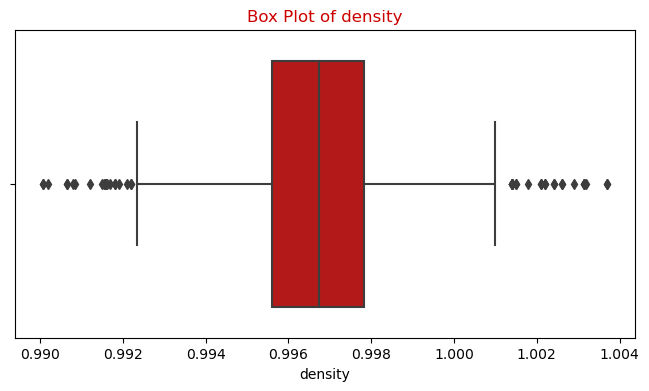

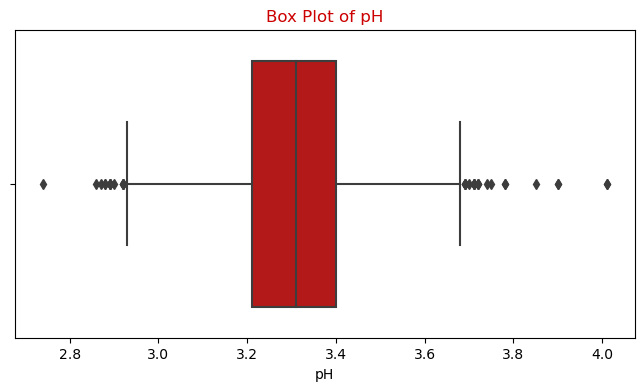

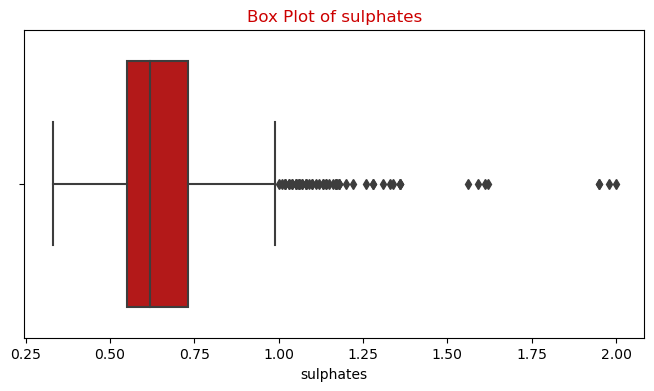

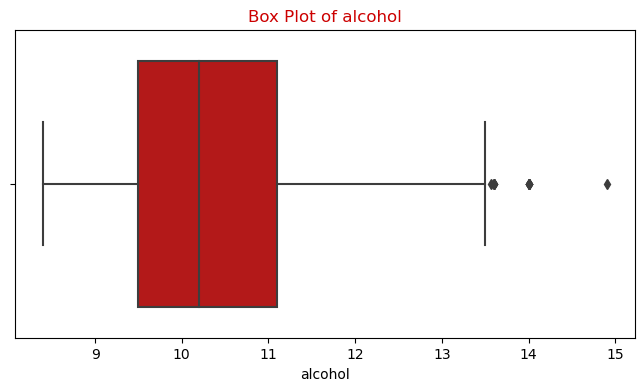

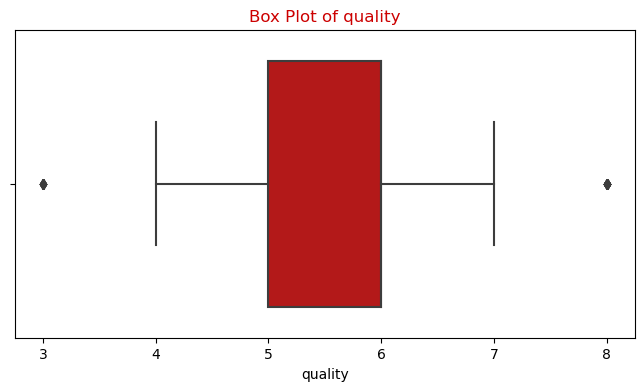

In [37]:
for column in data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column], color=ttu_red)
    plt.title(f'Box Plot of {column}', color=ttu_red)
    plt.show()

### Correlation Heatmap📈

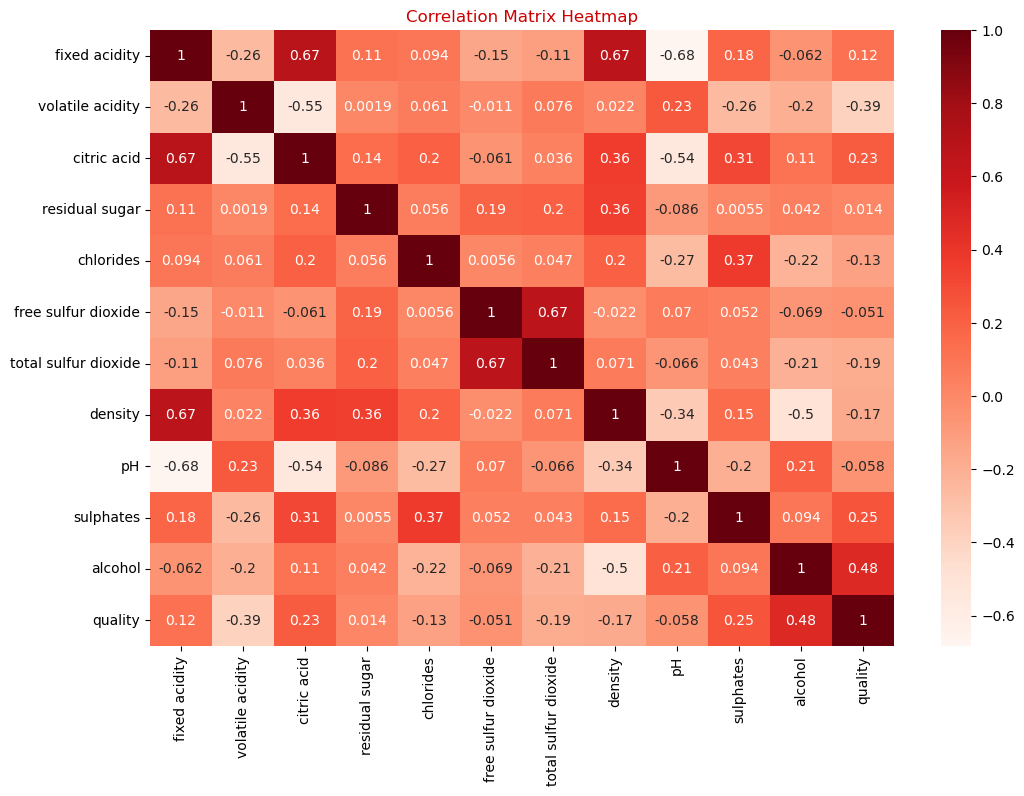

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='Reds')
plt.title('Correlation Matrix Heatmap', color=ttu_red)
plt.show()

### Seaborn Pairplot📈

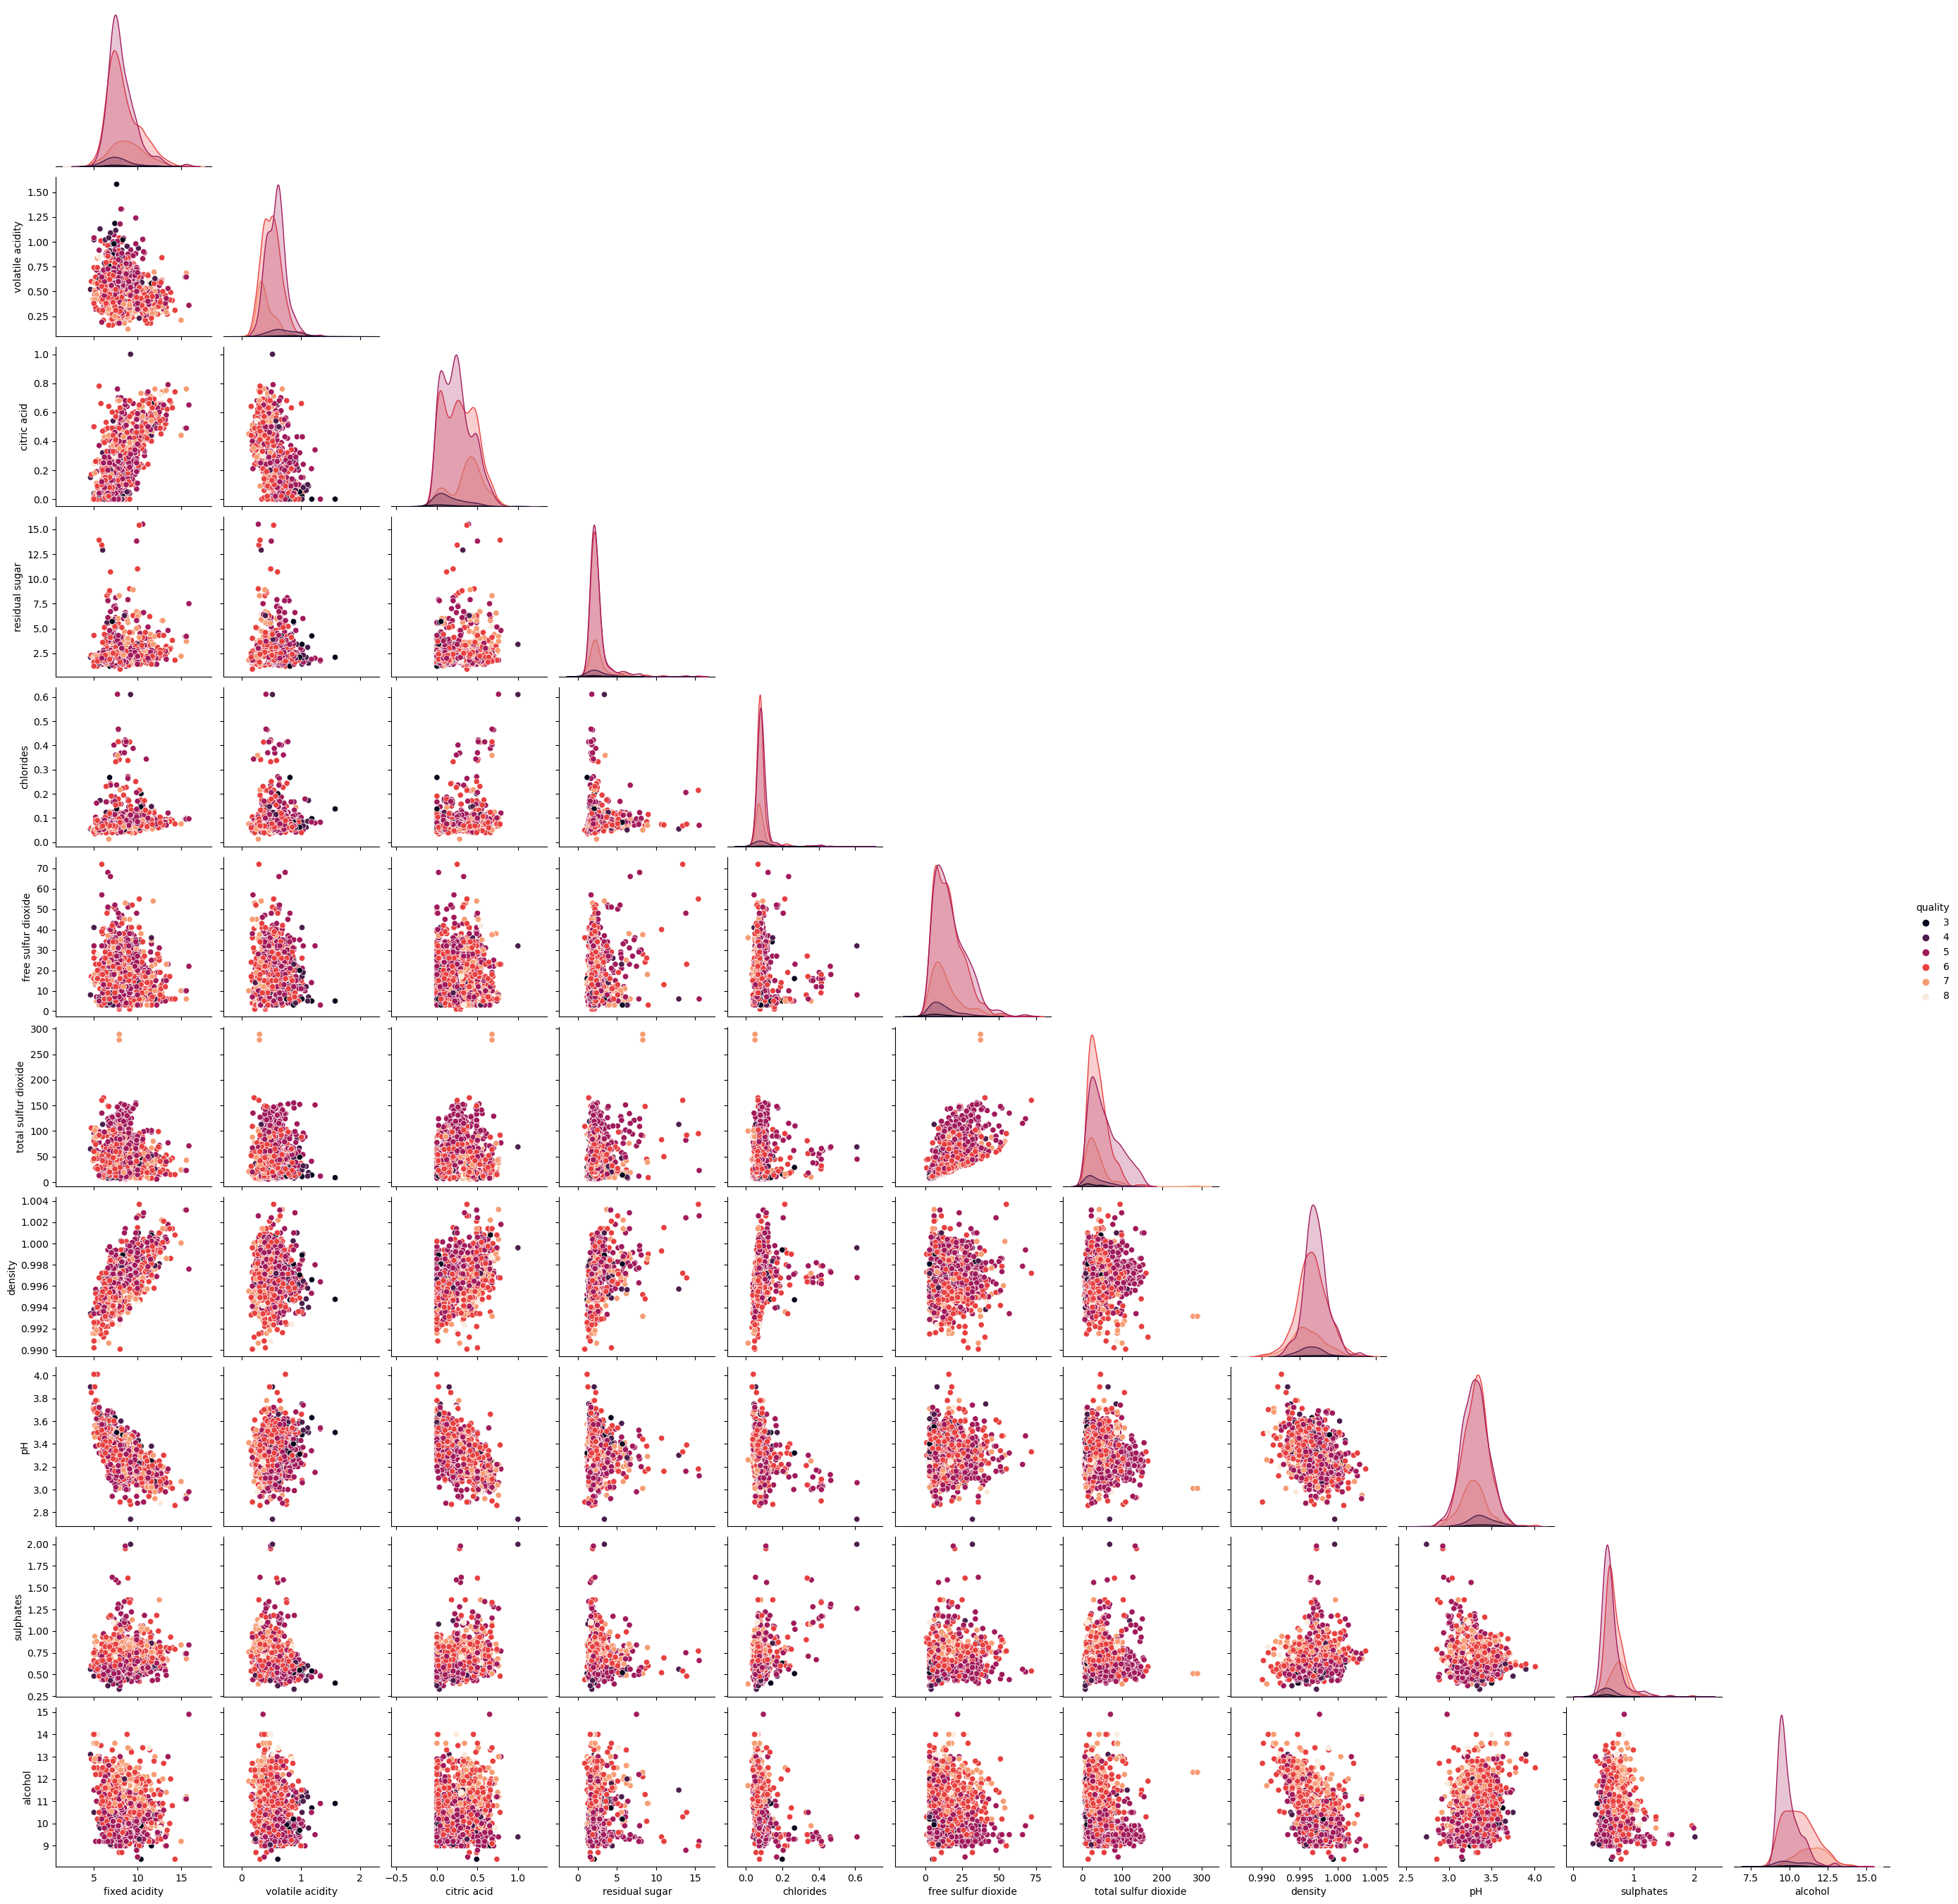

In [39]:
sns.pairplot(data, hue='quality', corner = True, palette='rocket')

## Model🍷

### Model Building📈

In [4]:
file_path = 'redwinequality(1).csv'  
wine_data = pd.read_csv(file_path)

wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x >= 6 else 0)

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation📈

In [6]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.740625
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.72       141
           1       0.79      0.74      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



### User Interface📈

In [7]:
def predict_wine_quality():
    try:
        properties = {
            'fixed acidity': float(input("Enter fixed acidity: ")),
            'volatile acidity': float(input("Enter volatile acidity: ")),
            'citric acid': float(input("Enter citric acid: ")),
            'residual sugar': float(input("Enter residual sugar: ")),
            'chlorides': float(input("Enter chlorides: ")),
            'free sulfur dioxide': float(input("Enter free sulfur dioxide: ")),
            'total sulfur dioxide': float(input("Enter total sulfur dioxide: ")),
            'density': float(input("Enter density: ")),
            'pH': float(input("Enter pH: ")),
            'sulphates': float(input("Enter sulphates: ")),
            'alcohol': float(input("Enter alcohol: "))
        }
        
        input_data = pd.DataFrame([properties])
        input_data_scaled = scaler.transform(input_data)
        prediction = model.predict(input_data_scaled)
        quality = 1 if prediction[0] == 1 else 0  

        user_input_with_prediction = input_data.copy()
        user_input_with_prediction['quality'] = quality

        save_input = input("Do you want to save this entry to the database? (yes/no): ").strip().lower()
        if save_input == 'yes':
            global wine_data  
            wine_data = wine_data.append(user_input_with_prediction, ignore_index=True)
            
            wine_data.to_csv('RedWineQuality.csv', index=False)  
            print("The entry has been added to the database.")

        return f"The predicted quality of the wine is: {'Good' if quality == 1 else 'Bad'}"

    except ValueError:
        return "Invalid input. Please enter numerical values for the physicochemical properties."

predict_wine_quality()

Enter fixed acidity:  7.4
Enter volatile acidity:  0.7
Enter citric acid:  0
Enter residual sugar:  1.9
Enter chlorides:  0.076
Enter free sulfur dioxide:  11
Enter total sulfur dioxide:  34
Enter density:  0.9978
Enter pH:  3.51
Enter sulphates:  0.56
Enter alcohol:  9.4
Do you want to save this entry to the database? (yes/no):  no


'The predicted quality of the wine is: Bad'

## Demonstration Video🍷

https://www.youtube.com/watch?v=oBVRZEKzQ3k